# **Project On Recommendation Systems**

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [3]:
col_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("u.data", sep='\t', names = col_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df['user_id'].nunique()

943

In [5]:
df['item_id'].nunique()

1682

In [6]:
movies_title = pd.read_csv("u.item", sep="\|", header=None, encoding="ISO-8859-1")
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movies_title=movies_title[[0, 1]]
movies_title.columns = ['item_id', 'title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# **Merging the Two Datasets**

In [8]:
df = pd.merge(df, movies_title, on="item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# **Applying EDA**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.groupby('title').mean()['rating'].sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
df.groupby('title').count()['rating'].sort_values(ascending = False)


title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [12]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [14]:
ratings.sort_values(by='rating', ascending = False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


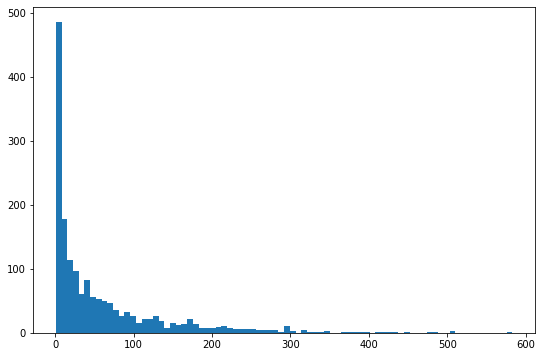

In [15]:
plt.figure(figsize=(9,6))
plt.hist(ratings['num of ratings'], bins = 80)
plt.show()

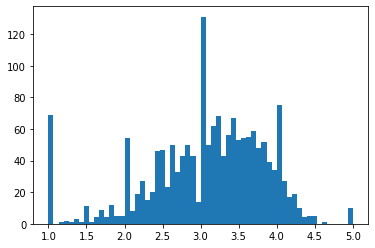

In [16]:
plt.hist(ratings['rating'], bins=60)
plt.show()

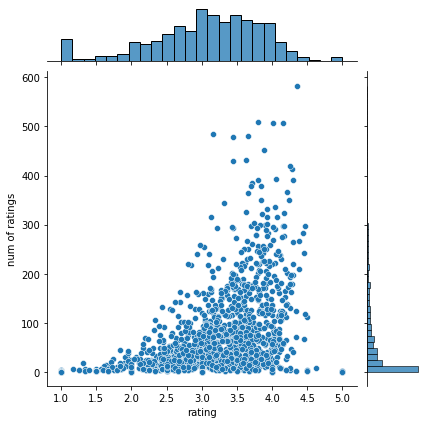

In [17]:
sns.jointplot(x='rating', y='num of ratings', data=ratings)

# **Creating Movie Recommendation System**

In [18]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [19]:
movies = df.pivot_table(index="user_id", columns="title", values="rating")
movies 

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [21]:
contact_user_ratings = movies['Contact (1997)']
contact_user_ratings.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [27]:
contact_movie_similar = movies.corrwith(contact_user_ratings)
contact_movie_similar = pd.DataFrame(contact_movie_similar, columns = ['Correlation'])
contact_movie_similar.dropna(inplace = True)
contact_movie_similar

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [28]:
contact_movie_similar.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
"Innocent Sleep, The (1995)",1.0
Harlem (1993),1.0


In [31]:
corr_contact = contact_movie_similar.join(ratings['num of ratings'])
corr_contact.head(10)

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93
"20,000 Leagues Under the Sea (1954)",0.052442,72
2001: A Space Odyssey (1968),0.014245,259
"39 Steps, The (1935)",-0.538617,59
8 1/2 (1963),-0.076123,38


In [32]:
corr_contact[corr_contact['num of ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
...,...,...
Snow White and the Seven Dwarfs (1937),-0.182526,172
"Ice Storm, The (1997)",-0.186964,108
Some Like It Hot (1959),-0.204401,128


In [35]:
def prediction_movies(movie_name):
  movie_user_ratings = movies[movie_name]
  similar_to_movie = movies.corrwith(movie_user_ratings)

  corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
  corr_movie.dropna(inplace = True)

  corr_movie = corr_movie.join(ratings['num of ratings'])
  predictions = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending = False)
  return predictions


In [36]:
predictions = prediction_movies("20,000 Leagues Under the Sea (1954)")
predictions.head()

,Correlation,num of ratings
title,,
Scream 2 (1997),0.811093,106
True Romance (1993),0.697741,104
Ben-Hur (1959),0.637665,124
Kiss the Girls (1997),0.559017,143
Seven Years in Tibet (1997),0.553470,155
